# ASE

*Add band path for BS plotting*

*Make a cube file and integrate it*

In this tutorial, we will learn how to use ASE (Atomic Simulation Environment), a python library for pre- and post-processing density functional theory (DFT) calculations. We start by importing the libraries we will need.

In [9]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read, write
from ase.visualize import view
from ase.build import make_supercell

ASE can read the input and output of Quantum Espresso calculations, using the function `read`.

In [2]:
inputFile = read("Si.scf.in",format="espresso-in")    # Read the input file
outputFile = read("Si.scf.out",format="espresso-out") # Read the output file

This function can also read many types of other files, including CIF files. It is then possible to extract the information contained in the variables `inputFile` and `outputFile`. For example, we can plot the crystal structure.

In [5]:
view(inputFile, repeat=(2,2,2))

<Popen: returncode: None args: ['/Users/cmorice/anaconda3/bin/python', '-m',...>

Notice that here, we repeated the unit cell twice along each lattice vector. It is also possible to read what the lattice defined in the input file is, and display some information about it.

In [3]:
lattice = inputFile.cell.get_bravais_lattice()     # Find the Bravais lattice defined in the input file
print(lattice.description())                       # Print the description of the lattice

FCC(a=5.39761)
  Variant name: FCC
  Special point names: GKLUWX
  Default path: GXWKGLUWLK,UX

  Special point coordinates:
    G   0.0000  0.0000  0.0000
    K   0.3750  0.3750  0.7500
    L   0.5000  0.5000  0.5000
    U   0.6250  0.2500  0.6250
    W   0.5000  0.2500  0.7500
    X   0.5000  0.0000  0.5000



As you can see, this yields the lattice type (face-centred cubic) and lattice constant, the coordinates of high-symmetry points in the Brillouin zone, and a default path in the Brillouin zone, which can be used to plot band structures. Is is also possible to plot the Brillouin zone, along with the high-symmetry points and the default path.

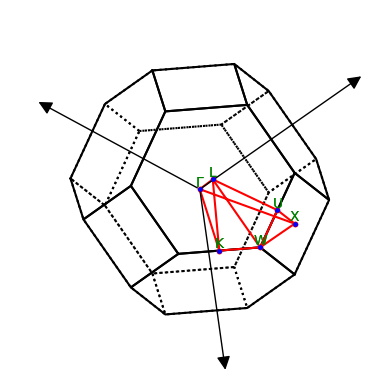

In [4]:
lattice.plot_bz(show=True)
plt.show()

One can also use ASE to create a supercell from the crystal structure contained in the input file. For example, we can repeat the unit cell twice along each lattice vector.

In [10]:
supercell = make_supercell(inputFile,2*np.eye(3))
view(supercell)

<Popen: returncode: None args: ['/Users/cmorice/anaconda3/bin/python', '-m',...>

This supercell can then, like any ASE crystal structure, be used to generate a Quantum Espresso input file.

In [ ]:
inp_data = {'calculation':'scf', 'restart_mode':'from_scratch', 'pseudo_dir':'.',
            'outdir' : 'tmp/', 'prefix':'Si-supercell',
            'ibrav' : 2, 'ntyp':1 , 'nat':2, 'occupations':'smearing', 'degauss':0.05, 'ecutwfc':18,
            'mixing_beta':0.7, 'conv_thr':1e-8}
pseudodict = {'Si': 'Si.pz-vbc.UPF'}

write('Si-supercell.scf.in', interface, pseudopotentials=pseudodict, input_data=inp_data, kpts=(4,4,4)) 

Since this is coded in Python, it is possible to make input files using variables within the parameters of the input file, or even in this name, for example `write('Si-%s.scf.in'%(i)...`

If the calculation is a relaxation, it is possible to select, out of all the crystal structures in the output, which structure to read, using the variable `index`. For example, here, we read all the structures used during the relaxation calculation.

In [11]:
outputRelaxation = read("Si.relax.out",index=':',format="espresso-out")

In this case, because `outputRelaxation` contains many crystal structures, `view` will put all of them in a sequence, which can be read like a video.

In [ ]:
view(outputRelaxation)

ASE can read the output of a calculation along a path in the Brillouin zone, just like any other output.

In [ ]:
outputBandFile = read("Si.band.out",format="espresso-out")

It is then possible to extract the calculated energies as an instance of ase.spectrum.band_structure.BandStructure, and to plot them as a band structure.

In [ ]:
bs = outputBandFile.calc.band_structure()            # Extracts the energies
fermi_energy = outputBandFile.calc.get_fermi_level() # Extracts the Fermi energy
bs.reference = fermi_energy                          # Set the reference of the plot at the Fermi energy
bs.plot(emin=-10, emax=20)                           # Plot the band structure
plt.show()

It is also possible to store this plot in a file.

In [ ]:
bs.plot(emin=-10, emax=20, filename='Si.png')

# For later

In [27]:
# Creating band paths
mybandpath = inputFile.cell.bandpath()
print(mybandpath.path)
mybandpath = inputFile.cell.bandpath('GKL')
print(mybandpath.path)

GXWKGLUWLK,UX
GKL
